# Objective for Part 1

We will be doing the following:
- download the data and data dictionary
- identify missing values and perform data cleaning.
- export the cleaned data.

### Download the data and data dictionary

Click here for the <a href = "https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectICUSurvival/data.csv">data</a> (61.7 MB)

Click here for the <a href = "https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectICUSurvival/data_dictionary.csv">data dictionary</a> (29.2 kB)

In [1]:
# Step 1: import your library
#installation
!pip install missingno

#basic libs
import pandas as pd
import os

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Step 4: Read your CSV
df = pd.read_csv(r"data/data.csv", index_col=0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91713 entries, 66154 to 1671
Columns: 185 entries, patient_id to apache_2_bodysystem
dtypes: float64(170), int64(7), object(8)
memory usage: 130.1+ MB
None


In [3]:
df.shape

(91713, 185)

In [4]:
# Step 5: count the number of NAs in each column
get_na = df.isna().sum()
print(get_na.sort_values(ascending=False))

h1_bilirubin_min    84619
h1_bilirubin_max    84619
h1_lactate_max      84369
h1_lactate_min      84369
h1_albumin_min      83824
                    ...  
icu_id                  0
icu_stay_type           0
icu_type                0
pre_icu_los_days        0
patient_id              0
Length: 185, dtype: int64


In [5]:
# Step 7 (Approach 1): Get a DataFrame of the sum of nulls, then print them line by line
# Step 7a: Declare a variable and save the sum of isnulls inside
# Step 7b: Reset the index()
df_na = get_na.to_frame().reset_index()

# Step 7c: Iterate through the rows and print out both the column containing the name of columns and the missing total
for i in range(len(df_na)):
    print(df_na.iloc[i, 0], df_na.iloc[i, 1])

patient_id 0
hospital_id 0
hospital_death 0
age 4228
bmi 3429
elective_surgery 0
ethnicity 1395
gender 25
height 1334
hospital_admit_source 21409
icu_admit_source 112
icu_id 0
icu_stay_type 0
icu_type 0
pre_icu_los_days 0
readmission_status 0
weight 2720
albumin_apache 54379
apache_2_diagnosis 1662
apache_3j_diagnosis 1101
apache_post_operative 0
arf_apache 715
bilirubin_apache 58134
bun_apache 19262
creatinine_apache 18853
fio2_apache 70868
gcs_eyes_apache 1901
gcs_motor_apache 1901
gcs_unable_apache 1037
gcs_verbal_apache 1901
glucose_apache 11036
heart_rate_apache 878
hematocrit_apache 19878
intubated_apache 715
map_apache 994
paco2_apache 70868
paco2_for_ph_apache 70868
pao2_apache 70868
ph_apache 70868
resprate_apache 1234
sodium_apache 18600
temp_apache 4108
urineoutput_apache 48998
ventilated_apache 715
wbc_apache 22012
d1_diasbp_invasive_max 67984
d1_diasbp_invasive_min 67984
d1_diasbp_max 165
d1_diasbp_min 165
d1_diasbp_noninvasive_max 1040
d1_diasbp_noninvasive_min 1040
d1_he

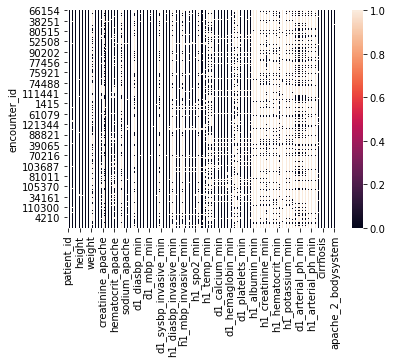

In [6]:
# Step 7 (Approach 2): Visualize the missing values
sns.heatmap(df.isna())
plt.show()

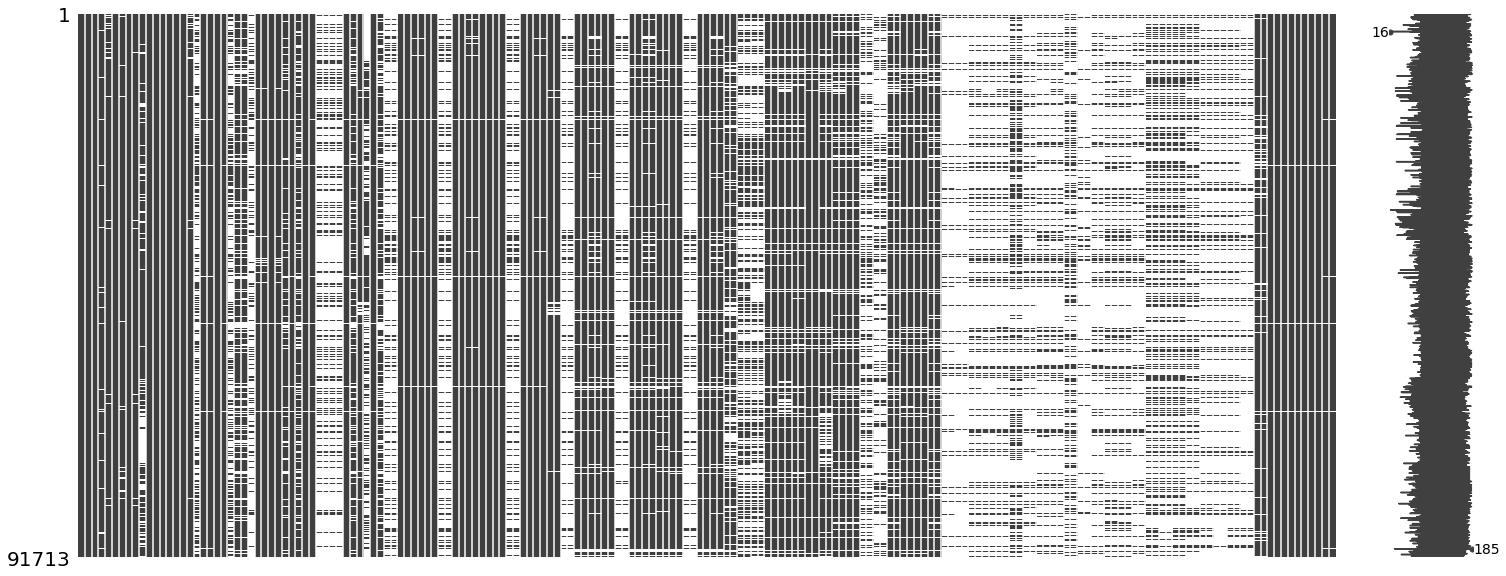

In [7]:
# Step 7 (Approach 2): Visualize the missing values
msno.matrix(df)
plt.show()

In [8]:
# Step 7 (Approach 3): Get a DataFrame of the sum of nulls, then export as CSV
# Step 7a: Declare a variable and save the sum of isnulls inside

# Step 7b: Reset the index()

# Step 7c: Export the DataFrame as CSV and inspect the CSV manually
df_na.to_csv(r"data/data_isnull.csv", index=False)

In [9]:
# Step 8: Drop NAs only based on the 15 columns mentioned above
subset = ["age",
    "bmi",
    "ethnicity",
    "gender",
    "height",
    "icu_admit_source",
    "weight",
    "aids",
    "cirrhosis",
    "diabetes_mellitus",
    "hepatic_failure",
    "immunosuppression",
    "leukemia",
    "lymphoma",
    "solid_tumor_with_metastasis"]
dfna_subset = df.dropna(subset=subset)
print(dfna_subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82965 entries, 66154 to 1671
Columns: 185 entries, patient_id to apache_2_bodysystem
dtypes: float64(170), int64(7), object(8)
memory usage: 117.7+ MB
None


In [10]:
# Step 9: Export your DataFrame as a CSV
dfna_subset.to_csv("data/data_part1.csv",index=False)